In [219]:
import pandas as pd
import seaborn as sns
import sklearn.linear_model as sklm
from sklearn import metrics
import matplotlib.pyplot as plt

In [211]:
xl = pd.ExcelFile("WDIdata3decades.xlsx")
xl.sheet_names

['WDIdata3decades']

In [212]:
df = xl.parse('WDIdata3decades')
df.head()

,Custom_Time_Code,Country Code,PA.NUS.PPP.05,PA.NUS.PRVT.PP.05,EG.CFT.ACCS.ZS,EG.ELC.ACCS.ZS,EG.ELC.ACCS.RU.ZS,EG.ELC.ACCS.UR.ZS,FX.OWN.TOTL.ZS,FX.OWN.TOTL.FE.ZS,...,SG.DMK.ALLD.FN.ZS,SG.VAW.REAS.ZS,SG.VAW.ARGU.ZS,SG.VAW.BURN.ZS,SG.VAW.GOES.ZS,SG.VAW.NEGL.ZS,SG.VAW.REFU.ZS,SP.M15.2024.FE.ZS,SP.M18.2024.FE.ZS,SH.DYN.AIDS.FE.ZS
0,1990s,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.80
1,1990s,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.07
2,1990s,BDI,NaN,NaN,NaN,3.329940,NaN,55.587460,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.68
3,1990s,BEN,NaN,NaN,NaN,17.179928,3.090880,40.592266,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.80,38.8,52.57
4,1990s,BFA,NaN,NaN,NaN,6.545372,0.943943,35.843561,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.75,62.0,47.59


In [218]:
emp_df = df.filter(regex=("^SL.EMP*"))
print(emp_df.shape)
emp_df.count()

(237, 25)


SL.EMP.MPYR.FE.ZS          231
SL.EMP.MPYR.MA.ZS          231
SL.EMP.MPYR.ZS             231
SL.EMP.TOTL.SP.FE.ZS       231
SL.EMP.TOTL.SP.FE.NE.ZS    165
SL.EMP.TOTL.SP.MA.ZS       231
SL.EMP.TOTL.SP.MA.NE.ZS    166
SL.EMP.TOTL.SP.ZS          231
SL.EMP.TOTL.SP.NE.ZS       171
SL.EMP.1524.SP.FE.ZS       231
SL.EMP.1524.SP.FE.NE.ZS    114
SL.EMP.1524.SP.MA.ZS       231
SL.EMP.1524.SP.MA.NE.ZS    114
SL.EMP.1524.SP.ZS          231
SL.EMP.1524.SP.NE.ZS       115
SL.EMP.SMGT.FE.ZS           49
SL.EMP.SELF.FE.ZS          231
SL.EMP.SELF.MA.ZS          231
SL.EMP.SELF.ZS             231
SL.EMP.VULN.FE.ZS          231
SL.EMP.VULN.MA.ZS          231
SL.EMP.VULN.ZS             231
SL.EMP.WORK.FE.ZS          231
SL.EMP.WORK.MA.ZS          231
SL.EMP.WORK.ZS             231
dtype: int64

In [215]:
emp_df.columns

Index(['SL.EMP.MPYR.FE.ZS', 'SL.EMP.MPYR.MA.ZS', 'SL.EMP.MPYR.ZS',
       'SL.EMP.TOTL.SP.FE.ZS', 'SL.EMP.TOTL.SP.FE.NE.ZS',
       'SL.EMP.TOTL.SP.MA.ZS', 'SL.EMP.TOTL.SP.MA.NE.ZS', 'SL.EMP.TOTL.SP.ZS',
       'SL.EMP.TOTL.SP.NE.ZS', 'SL.EMP.1524.SP.FE.ZS',
       'SL.EMP.1524.SP.FE.NE.ZS', 'SL.EMP.1524.SP.MA.ZS',
       'SL.EMP.1524.SP.MA.NE.ZS', 'SL.EMP.1524.SP.ZS', 'SL.EMP.1524.SP.NE.ZS',
       'SL.EMP.SMGT.FE.ZS', 'SL.EMP.SELF.FE.ZS', 'SL.EMP.SELF.MA.ZS',
       'SL.EMP.SELF.ZS', 'SL.EMP.VULN.FE.ZS', 'SL.EMP.VULN.MA.ZS',
       'SL.EMP.VULN.ZS', 'SL.EMP.WORK.FE.ZS', 'SL.EMP.WORK.MA.ZS',
       'SL.EMP.WORK.ZS'],
      dtype='object')

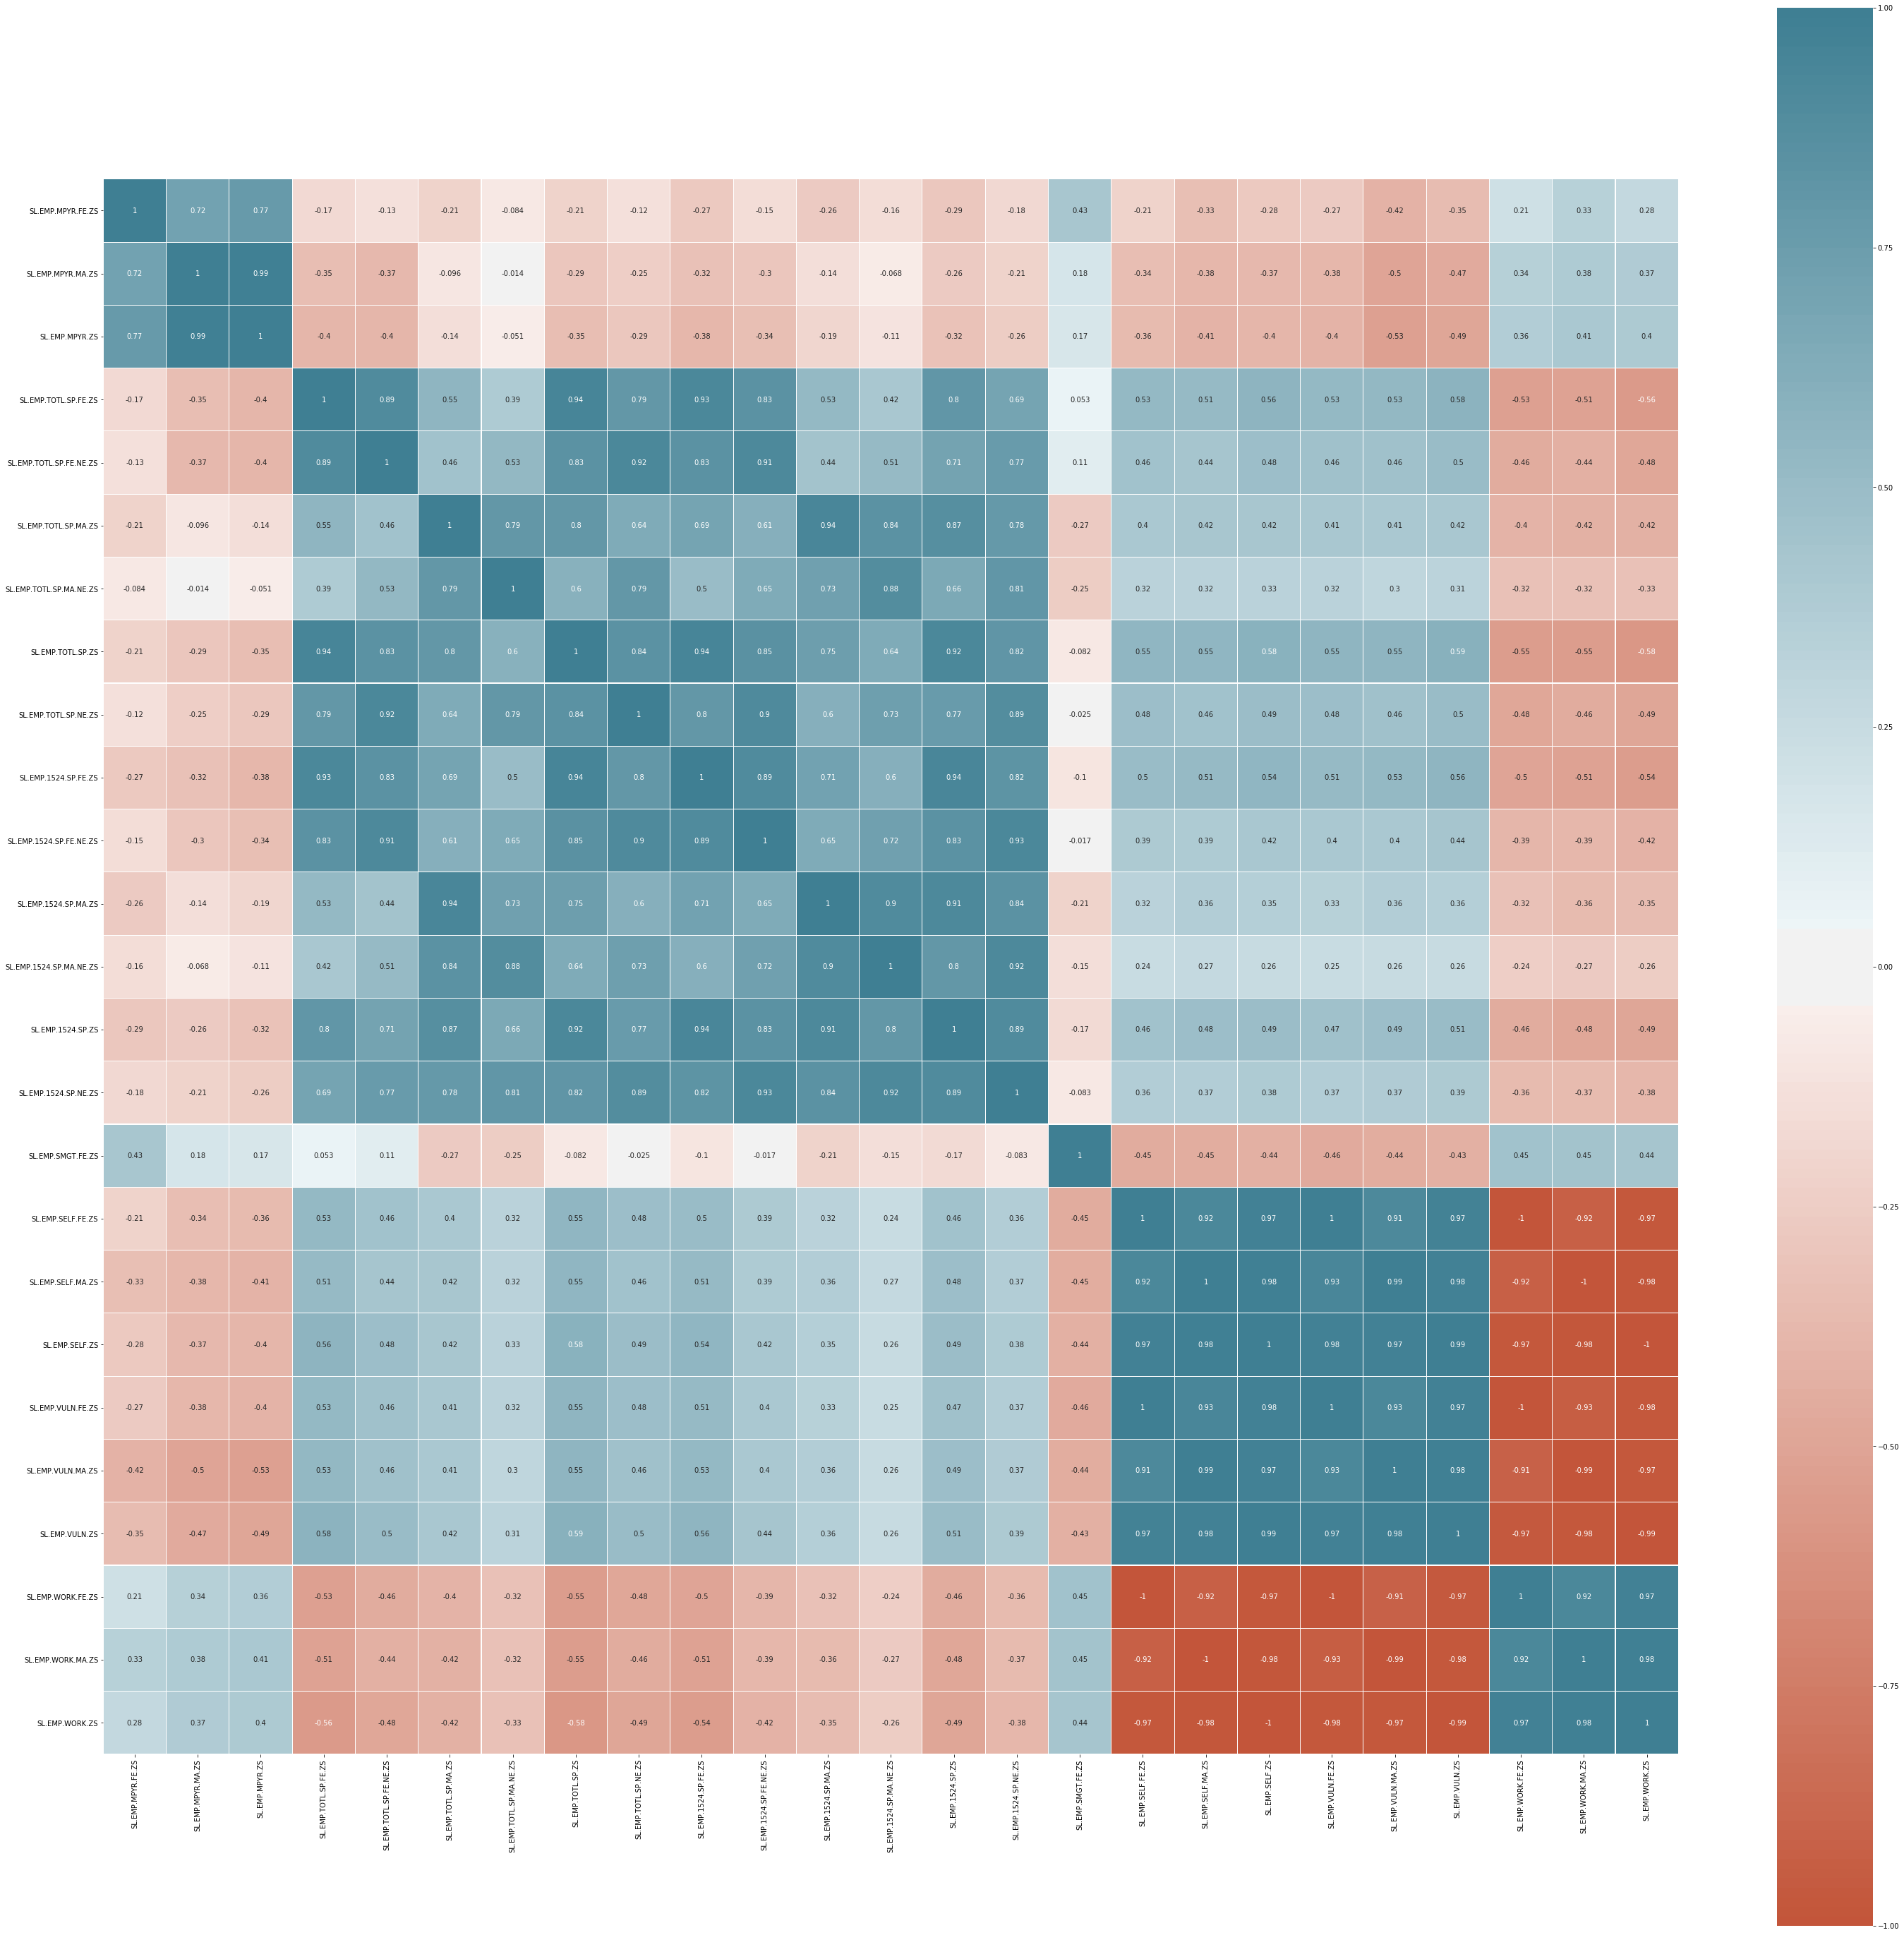

[['SL.EMP.MPYR.FE.ZS', 'SL.EMP.MPYR.MA.ZS', 'SL.EMP.MPYR.ZS', 'SL.EMP.SMGT.FE.ZS'], ['SL.EMP.MPYR.FE.ZS', 'SL.EMP.MPYR.MA.ZS', 'SL.EMP.MPYR.ZS'], ['SL.EMP.MPYR.FE.ZS', 'SL.EMP.MPYR.MA.ZS', 'SL.EMP.MPYR.ZS', 'SL.EMP.WORK.MA.ZS'], ['SL.EMP.TOTL.SP.FE.ZS', 'SL.EMP.TOTL.SP.FE.NE.ZS', 'SL.EMP.TOTL.SP.MA.ZS', 'SL.EMP.TOTL.SP.ZS', 'SL.EMP.TOTL.SP.NE.ZS', 'SL.EMP.1524.SP.FE.ZS', 'SL.EMP.1524.SP.FE.NE.ZS', 'SL.EMP.1524.SP.MA.ZS', 'SL.EMP.1524.SP.MA.NE.ZS', 'SL.EMP.1524.SP.ZS', 'SL.EMP.1524.SP.NE.ZS', 'SL.EMP.SELF.FE.ZS', 'SL.EMP.SELF.MA.ZS', 'SL.EMP.SELF.ZS', 'SL.EMP.VULN.FE.ZS', 'SL.EMP.VULN.MA.ZS', 'SL.EMP.VULN.ZS'], ['SL.EMP.TOTL.SP.FE.ZS', 'SL.EMP.TOTL.SP.FE.NE.ZS', 'SL.EMP.TOTL.SP.MA.ZS', 'SL.EMP.TOTL.SP.MA.NE.ZS', 'SL.EMP.TOTL.SP.ZS', 'SL.EMP.TOTL.SP.NE.ZS', 'SL.EMP.1524.SP.FE.ZS', 'SL.EMP.1524.SP.FE.NE.ZS', 'SL.EMP.1524.SP.MA.ZS', 'SL.EMP.1524.SP.MA.NE.ZS', 'SL.EMP.1524.SP.ZS', 'SL.EMP.1524.SP.NE.ZS', 'SL.EMP.SELF.FE.ZS', 'SL.EMP.SELF.MA.ZS', 'SL.EMP.SELF.ZS', 'SL.EMP.VULN.FE.ZS', 'SL.EM

In [216]:
# Compute correlation matrix. Only select subset of features with a correlation above threshold.
def correlation(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(50,50))
    sns.heatmap(corr_matrix,linewidths=0.1,vmax=1.0,
            square=True, cmap=sns.diverging_palette(20,220, n=200), linecolor='white', annot=True)
    plt.show()
    corr_features = []
    for i in range(len(corr_matrix.columns)):
        features = []
        for j in range(len(corr_matrix.columns)):
            if corr_matrix.iloc[i, j] >= 0.4:
                #print(corr_matrix.columns[j])
                features.append(corr_matrix.columns[j])
        corr_features.append(features)    
    return corr_features         

correlated_features = correlation(emp_df) 
print(correlated_features)






In [217]:
'''
To predict a feature X we find other features that are highly correlated with X. corr_feature_df is the subset of data 
with X and its correlated features. 
X_train: Dataset with non-null values of feature X. Drop X and fill in the null values with train_data.mean()
X_test: Dataset with null values of feature X. Drop X and fill in the null values with train_data.mean()
y_train: rows with non null values of X
y_test: rows with null values of X

For every feature apply linear regression and predict the missing values of that feature. Copy it to the original dataset 
so that the values of that feature can be used to make prediction for the remaining features

'''
for i, col in enumerate(emp_df.columns):
    emp_df_copy = emp_df.copy()
    print('feature',col)
    corr_feature_df = emp_df_copy[correlated_features[i]]
    
    test_data = corr_feature_df[corr_feature_df[col].isnull()]
    print('test data',test_data)
    
    #corr_feature_df.dropna(inplace=True)
    
    print(corr_feature_df)
    y_train = corr_feature_df[col]
    y_train = y_train.fillna(y_train.mean())
    
    X_train = corr_feature_df.drop(col, axis=1)
    X_train = X_train.fillna(X_train.mean())
    
    X_test = test_data.drop(col, axis=1)
    
    #X_test.dropna(inplace=True)
    X_test = X_test.fillna(X_train.mean())
    print('X test', X_test)
    
    model = sklm.LinearRegression()
    model.fit(X_train, y_train)
    
    #Training accuracy
    print('accuracy', model.score(X_train, y_train))
    
    y_pred = model.predict(X_test)
    print('col',col, 'prediction',y_pred)
    print(test_data.index.values)
    for c,r in enumerate(test_data.index.values):
        emp_df.iloc[r][col] = y_pred[c]

feature SL.EMP.MPYR.FE.ZS
test data      SL.EMP.MPYR.FE.ZS  SL.EMP.MPYR.MA.ZS  SL.EMP.MPYR.ZS  SL.EMP.SMGT.FE.ZS
19                 NaN                NaN             NaN                NaN
31                 NaN                NaN             NaN                NaN
98                 NaN                NaN             NaN                NaN
110                NaN                NaN             NaN                NaN
177                NaN                NaN             NaN          18.190001
189                NaN                NaN             NaN                NaN
     SL.EMP.MPYR.FE.ZS  SL.EMP.MPYR.MA.ZS  SL.EMP.MPYR.ZS  SL.EMP.SMGT.FE.ZS
0             0.108222           0.651222        0.472333                NaN
1             2.099667           5.686667        3.955111                NaN
2             0.034667           0.112444        0.071333                NaN
3             0.430556           1.696222        1.145778                NaN
4             0.343556           1.12000

X test      SL.EMP.TOTL.SP.FE.ZS  SL.EMP.TOTL.SP.MA.ZS  SL.EMP.TOTL.SP.MA.NE.ZS  \
0               41.564666             79.534777                69.059765   
1               57.446333             65.662000                69.059765   
3               59.627999             84.809222                69.059765   
7               54.135334             75.205557                69.059765   
8               60.505667             75.011444                69.059765   
..                    ...                   ...                      ...   
217             15.540600             64.056499                69.059765   
218             61.316200             66.331401                69.059765   
219             33.408100             69.674800                69.059765   
222             62.977200             76.874500                69.059765   
233             57.524100             75.454000                69.059765   

     SL.EMP.TOTL.SP.ZS  SL.EMP.TOTL.SP.NE.ZS  SL.EMP.1524.SP.FE.ZS  \
0         

X test      SL.EMP.TOTL.SP.FE.ZS  SL.EMP.TOTL.SP.FE.NE.ZS  SL.EMP.TOTL.SP.MA.NE.ZS  \
19              51.052965                48.617199                69.059765   
31              51.052965                48.617199                69.059765   
98              51.052965                48.617199                69.059765   
110             50.909898                14.790000                26.514999   
177             51.036797                39.781200                64.203903   
189             51.006370                33.065451                47.629650   

     SL.EMP.TOTL.SP.ZS  SL.EMP.TOTL.SP.NE.ZS  SL.EMP.1524.SP.FE.ZS  \
19           61.254685             58.824638             39.277175   
31           61.254685             58.824638             39.277175   
98           61.254685             58.824638             39.277175   
110          61.254685             20.415000             39.277175   
177          61.254685             51.851898             39.277175   
189          61.254

[66 rows x 17 columns]
accuracy 0.9882957568539487
col SL.EMP.TOTL.SP.NE.ZS prediction [58.03070954 59.75681746 59.20879196 59.2031931  59.30862397 59.37408115
 59.06193511 58.48576086 58.68369266 58.31147585 59.13604545 58.9122212
 58.74446746 58.86500268 59.26094713 58.82553464 58.9122212  58.91146196
 59.31836795 58.44531771 58.39974426 58.71176099 58.9916593  59.12079017
 57.95151027 58.4613559  58.82720253 58.72793472 58.76927553 58.86714688
 59.15715748 57.8955636  58.64289769 59.37059945 58.69825782 58.90813274
 58.91392156 59.18251015 59.2849191  59.01888675 58.75558411 58.49891877
 59.17276624 58.9122212  58.91836025 59.32156867 58.63902336 59.40195565
 58.4733879  58.63942633 59.13215137 58.6999469  58.35262443 59.00354358
 59.2466899  59.38586308 58.72355985 59.22533041 58.82989956 59.36715633
 59.09242799 58.71765001 58.8897929  59.00010987 59.02226282 59.10510337]
[  0   1   3   7   8  11  12  13  14  15  17  19  21  22  23  29  31  33
  37  39  42  45  50  51  52  54  56 

X test      SL.EMP.TOTL.SP.FE.ZS  SL.EMP.TOTL.SP.FE.NE.ZS  SL.EMP.TOTL.SP.MA.ZS  \
19              51.052965                48.617199             71.655376   
31              51.052965                48.617199             71.655376   
98              51.052965                48.617199             71.655376   
110             50.909898                14.790000             71.786346   
177             51.036797                39.781200             71.675372   
189             51.006370                33.065451             71.735307   

     SL.EMP.TOTL.SP.MA.NE.ZS  SL.EMP.TOTL.SP.ZS  SL.EMP.TOTL.SP.NE.ZS  \
19                 69.037908          61.255790             58.912221   
31                 69.037908          61.255790             58.912221   
98                 69.037908          61.255790             58.912221   
110                26.514999          61.211802             20.415000   
177                64.203903          61.260609             51.851898   
189                47.

accuracy 0.9997720010027173
col SL.EMP.1524.SP.MA.ZS prediction [50.31170266 50.31170266 50.31170266 50.33328251 50.3114109  50.3245787 ]
[ 19  31  98 110 177 189]
feature SL.EMP.1524.SP.MA.NE.ZS
test data      SL.EMP.TOTL.SP.FE.ZS  SL.EMP.TOTL.SP.FE.NE.ZS  SL.EMP.TOTL.SP.MA.ZS  \
0               41.564666                41.640543             79.534777   
1               57.446333                48.458149             65.662000   
2               86.566555                85.800003             85.067890   
3               59.627999                48.847121             84.809222   
4               70.889445                72.000000             87.642111   
..                    ...                      ...                   ...   
218             61.316200                45.978026             66.331401   
219             33.408100                49.268365             69.674800   
222             62.977200                49.847036             76.874500   
231             50.553501         

col SL.EMP.1524.SP.MA.NE.ZS prediction [46.80906736 45.62111996 45.88255755 46.40638289 46.51861655 47.54296953
 45.38899685 45.80229717 45.9507481  45.74440227 45.57113401 45.50845279
 45.57762463 45.17704955 46.72307586 45.62213215 45.16351926 46.02906545
 45.88859048 45.23517149 45.48381301 45.68987758 46.02447312 47.13313882
 46.41340454 46.79519935 46.12959899 45.88859048 44.99292836 45.60634003
 46.63865657 46.58801933 45.73643481 45.82196134 45.78354166 45.97863859
 45.40024876 44.96148569 46.1242476  45.66735457 46.34456851 45.65759761
 46.90957756 46.03018091 47.91993889 46.25929602 45.55241725 45.83925062
 45.84426502 46.56759191 45.7101149  46.3334166  45.92538002 45.30579905
 46.63042624 45.99842075 45.59325167 47.15113056 45.31235855 46.95353142
 46.01215409 45.67333368 45.83617334 46.07979851 46.1008648  45.89605645
 46.00579087 45.87209196 46.13299278 45.86142977 45.84601062 45.69551994
 45.39927284 45.92516833 45.70893221 45.43224373 45.92007847 45.71160741
 46.08297011

[122 rows x 11 columns]
accuracy 0.9954130613262526
col SL.EMP.1524.SP.NE.ZS prediction [40.49661422 40.30546843 40.43821506 40.34801239 40.41880183 40.3885531
 40.28638224 40.28538825 40.3273253  40.26791746 40.37035393 40.3840967
 40.32239388 40.34298624 40.42657865 40.38394456 40.44649208 40.35470199
 40.34950781 40.3399757  40.41502439 40.26282657 40.35050114 40.42562532
 40.31174067 40.38911456 40.3410938  40.34950781 40.37897038 40.32316682
 40.37496066 40.36321927 40.30395588 40.36365969 40.30708582 40.47644279
 40.27359425 40.65658668 40.37646341 40.37860874 39.97214734 40.35206576
 40.24303955 40.43486728 40.51418856 40.39790952 40.37707499 40.43114765
 40.30287816 40.47183499 40.328071   40.22794998 40.38367423 40.40819888
 40.25706986 40.18829021 40.43963941 40.39907306 40.20768964 40.47479555
 40.39091578 40.41788406 40.3145368  40.32732698 40.36594828 40.39940375
 40.36473166 40.35439639 40.30600708 40.39883199 40.34252104 40.42077858
 40.27921025 40.360698   40.42412548 4

X test      SL.EMP.TOTL.SP.FE.ZS  SL.EMP.TOTL.SP.FE.NE.ZS  SL.EMP.TOTL.SP.MA.ZS  \
19              51.052965                48.617199             71.655376   
31              51.052965                48.617199             71.655376   
98              51.052965                48.617199             71.655376   
110             50.909898                14.790000             71.786346   
177             51.036797                39.781200             71.675372   
189             51.006370                33.065451             71.735307   

     SL.EMP.TOTL.SP.ZS  SL.EMP.TOTL.SP.NE.ZS  SL.EMP.1524.SP.FE.ZS  \
19           61.255790             58.912221             39.277102   
31           61.255790             58.912221             39.277102   
98           61.255790             58.912221             39.277102   
110          61.211802             20.415000             39.436777   
177          61.260609             51.851898             39.260768   
189          61.230639             40.05

X test      SL.EMP.TOTL.SP.FE.ZS  SL.EMP.TOTL.SP.FE.NE.ZS  SL.EMP.TOTL.SP.MA.ZS  \
19              51.052965                48.617199             71.655376   
31              51.052965                48.617199             71.655376   
98              51.052965                48.617199             71.655376   
110             50.909898                14.790000             71.786346   
177             51.036797                39.781200             71.675372   
189             51.006370                33.065451             71.735307   

     SL.EMP.TOTL.SP.ZS  SL.EMP.TOTL.SP.NE.ZS  SL.EMP.1524.SP.FE.ZS  \
19           61.255790             58.912221             39.277102   
31           61.255790             58.912221             39.277102   
98           61.255790             58.912221             39.277102   
110          61.211802             20.415000             39.436777   
177          61.260609             51.851898             39.260768   
189          61.230639             40.05